<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-12 01:10:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  39.4MB/s    in 4.6s    

2025-09-12 01:10:49 (44.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [12]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [13]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Tables in the database:
   name
0  main
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


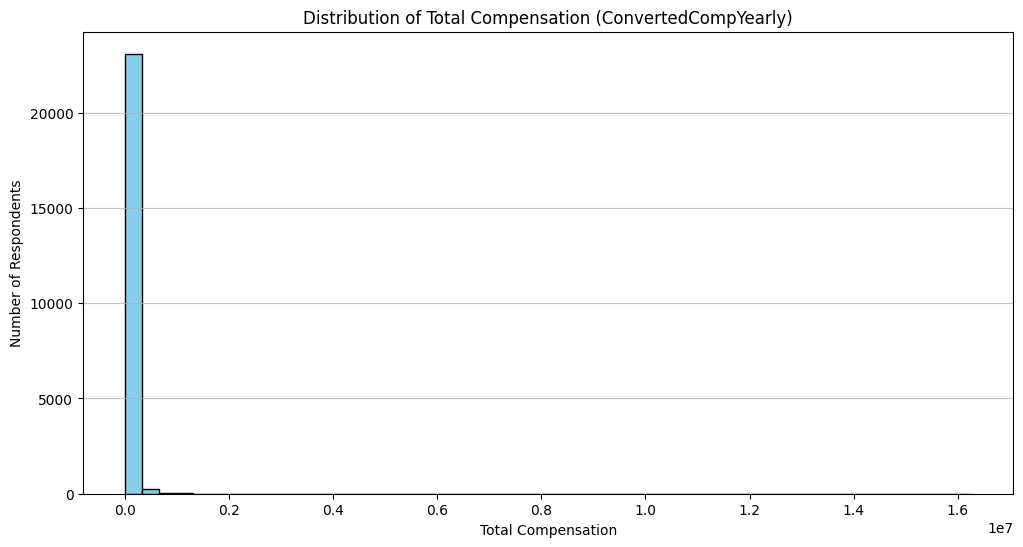

In [17]:
# Step 1: Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 3: Check the first few rows and columns to confirm the correct compensation column
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

# Optional: Inspect the first row to check column names
df_preview = pd.read_sql_query("SELECT * FROM main LIMIT 5;", conn)
print(df_preview.columns)

# Step 4: Query the compensation column
# Replace 'ConvertedCompYearly' with 'CompTotal' if your table has that column
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Step 5: Close the connection
conn.close()

# Step 6: Plot histogram
plt.figure(figsize=(12,6))
plt.hist(df_comp['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Compensation (ConvertedCompYearly)")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', alpha=0.75)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


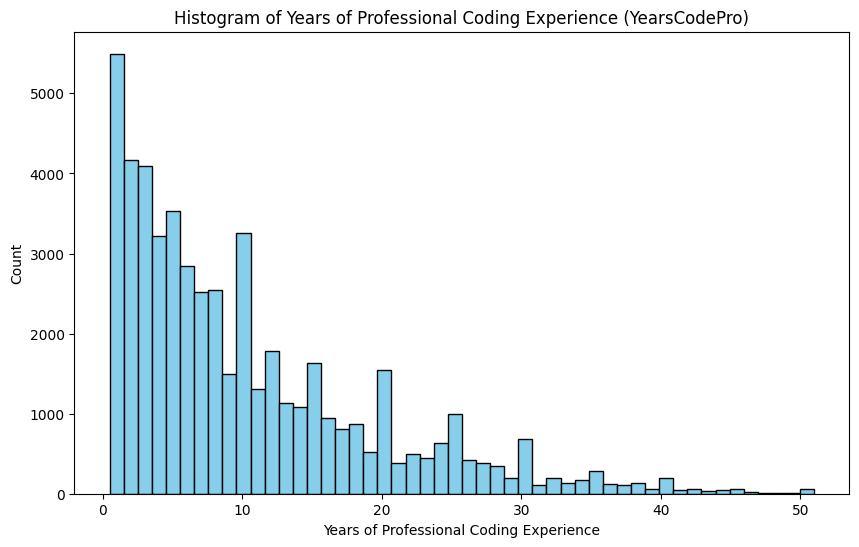

In [19]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the YearsCodePro column
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df_years = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert YearsCodePro to numeric values
def convert_years(x):
    try:
        return float(x)
    except:
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 51  # You can adjust the upper limit if needed
        else:
            return None

df_years['YearsCodePro_num'] = df_years['YearsCodePro'].apply(convert_years)

# Drop missing values
df_years = df_years.dropna(subset=['YearsCodePro_num'])

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_years['YearsCodePro_num'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Years of Professional Coding Experience (YearsCodePro)")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Count")
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


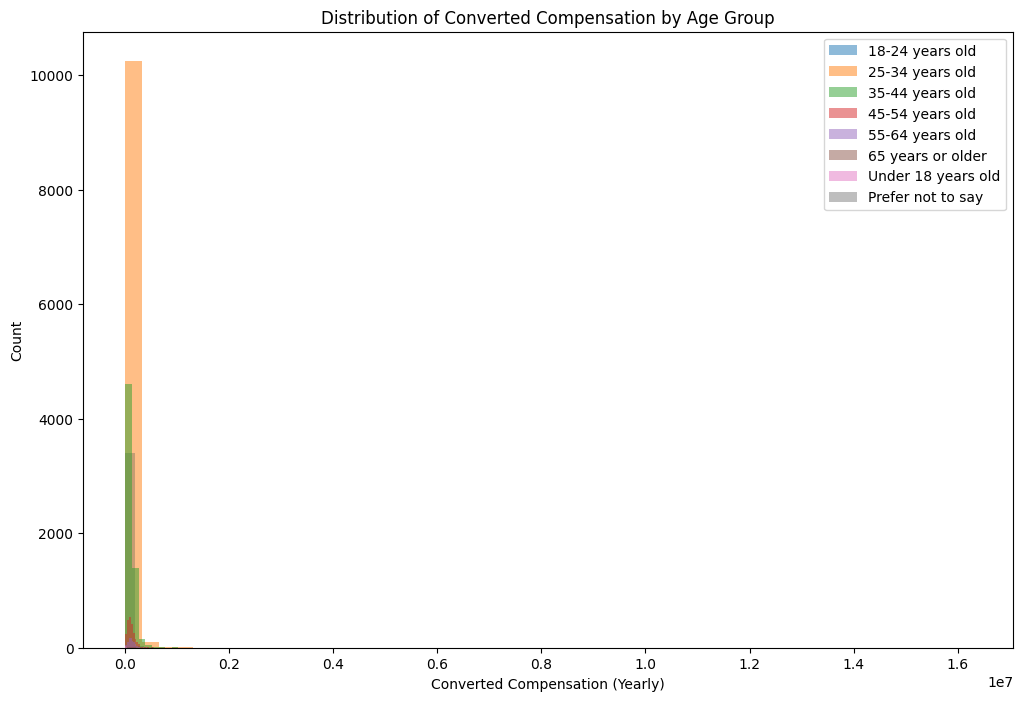

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and ConvertedCompYearly
QUERY = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Some compensation values may still be invalid, convert to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

# Plot histogram comparison
age_groups = df['Age'].unique()
plt.figure(figsize=(12,8))

for age in age_groups:
    subset = df[df['Age'] == age]
    plt.hist(subset['ConvertedCompYearly'], bins=50, alpha=0.5, label=age)

plt.title("Distribution of Converted Compensation by Age Group")
plt.xlabel("Converted Compensation (Yearly)")
plt.ylabel("Count")
plt.legend()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_567/3630016896.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', len(age_groups))


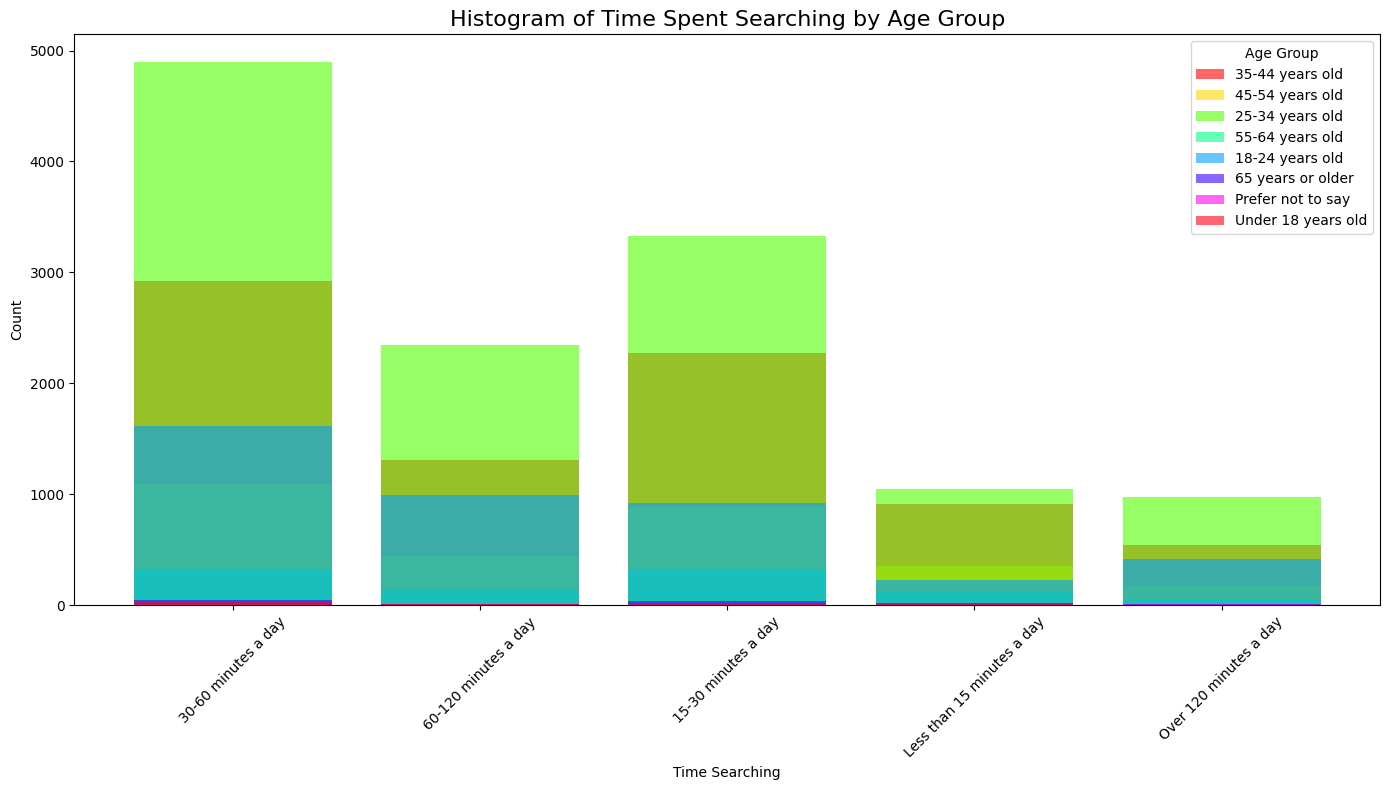

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL
AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close connection
conn.close()

# Convert to string (categorical)
df['TimeSearching'] = df['TimeSearching'].astype(str)

# Unique age groups and categories
age_groups = df['Age'].unique()
categories = df['TimeSearching'].unique()

# Vibrant colors for age groups
colors = plt.cm.get_cmap('hsv', len(age_groups))

plt.figure(figsize=(14,8))

for i, age in enumerate(age_groups):
    subset = df[df['Age'] == age]
    counts = subset['TimeSearching'].value_counts().reindex(categories, fill_value=0)
    plt.bar(categories, counts, alpha=0.6, color=colors(i), label=age)

plt.title("Histogram of Time Spent Searching by Age Group", fontsize=16)
plt.xlabel("Time Searching")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


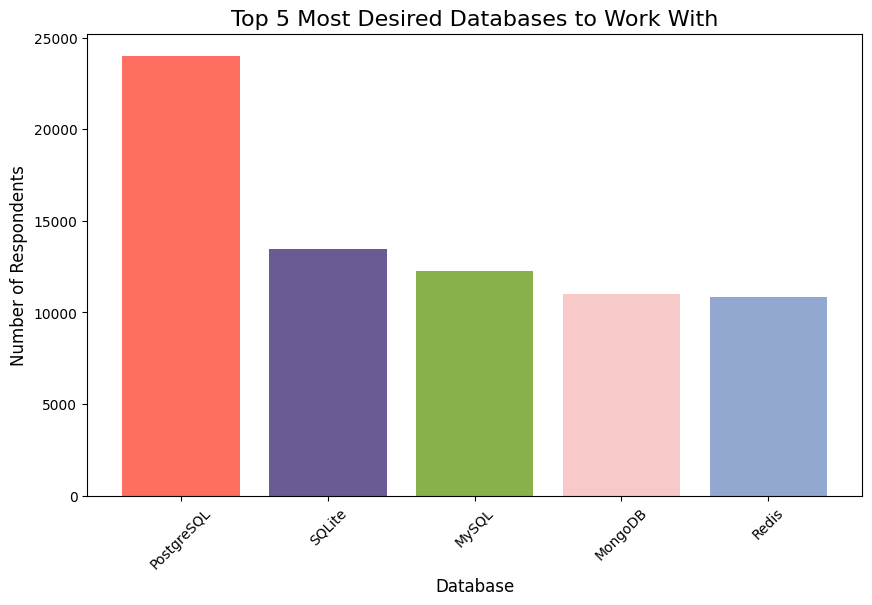

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the DatabaseWantToWorkWith column
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Split multiple databases in each row (if separated by ;) and explode into single values
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode()

# Step 5: Count the top 5 most desired databases
top5 = all_databases.value_counts().head(5)

# Step 6: Plot the histogram (bar chart)
plt.figure(figsize=(10,6))
plt.bar(top5.index, top5.values, color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1'])
plt.title("Top 5 Most Desired Databases to Work With", fontsize=16)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [ ]:
## Write your code here

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


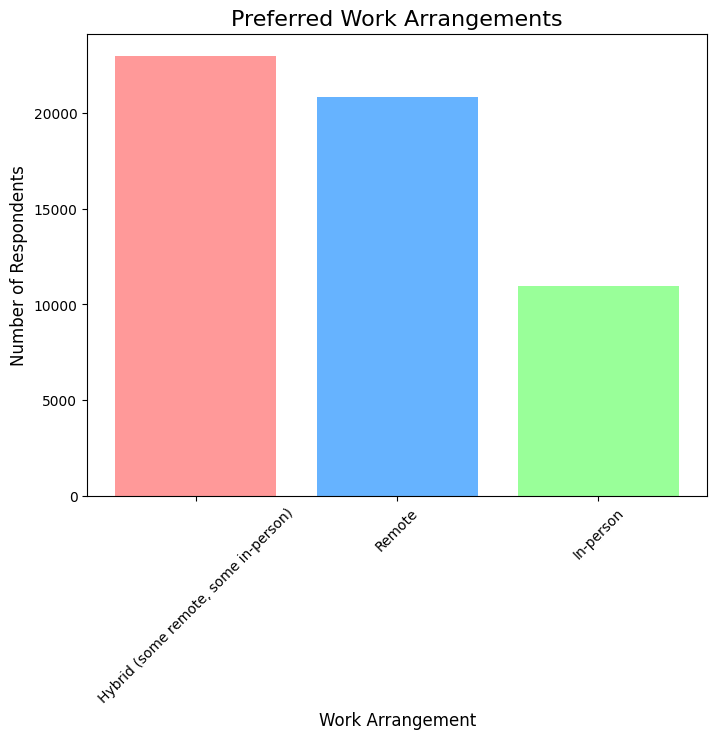

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the RemoteWork column
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Count the frequency of each type of remote work preference
remote_counts = df['RemoteWork'].value_counts()

# Step 5: Plot the histogram (bar chart)
plt.figure(figsize=(8,6))
plt.bar(remote_counts.index, remote_counts.values, color=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title("Preferred Work Arrangements", fontsize=16)
plt.xlabel("Work Arrangement", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


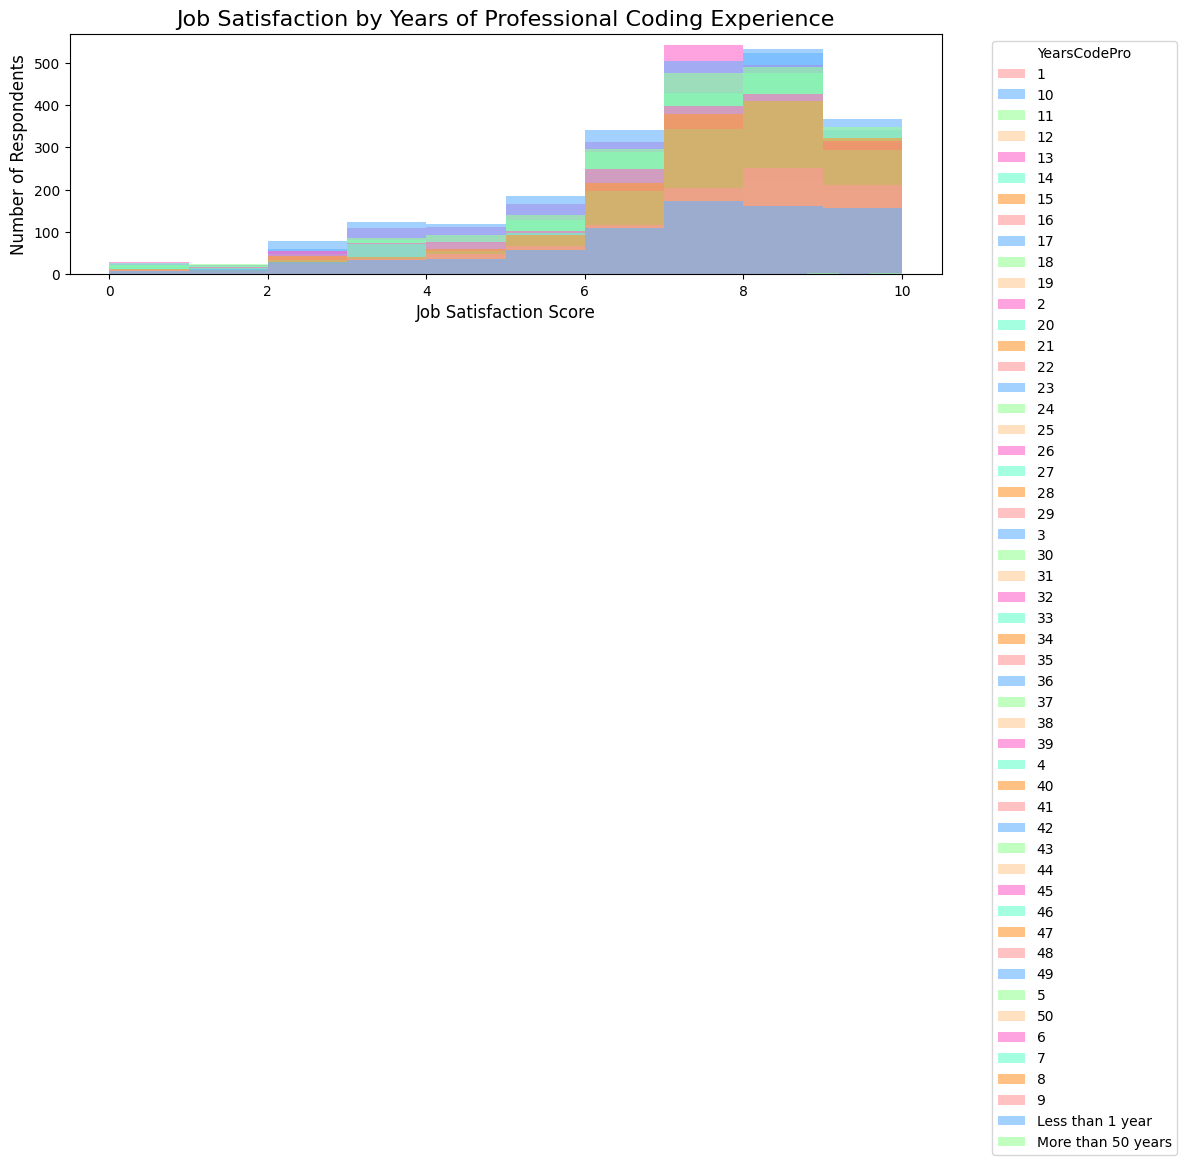

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query JobSat and YearsCodePro columns
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Group data by YearsCodePro
years_groups = df['YearsCodePro'].unique()
plt.figure(figsize=(12,8))

colors = ['#FF9999','#66B3FF','#99FF99','#FFCC99','#FF66CC','#66FFCC','#FF9933']

for i, group in enumerate(sorted(years_groups)):
    subset = df[df['YearsCodePro'] == group]
    plt.hist(subset['JobSat'], bins=10, alpha=0.6, label=group, color=colors[i % len(colors)])

# Step 5: Add labels and legend
plt.title("Job Satisfaction by Years of Professional Coding Experience", fontsize=16)
plt.xlabel("Job Satisfaction Score", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.legend(title="YearsCodePro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [2]:
import sqlite3

# Reconnect to your database
conn = sqlite3.connect('survey-data.sqlite')

# Now close the connection
conn.close()


### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
